In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choices
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
# Open the data
dat =  pd.read_csv('../TD1/data_body/body.dat', sep='\s+', header=None) # Open the data file
Description = pd.read_csv('../TD1/data_body/description.csv', sep=';', header=0) # Open description.csv with description and names of each variables
dat = dat.rename(mapper=Description.loc[:,'Name'],axis=1) # Rename columns from dat with the name of the variable

# Remove outliers
dat.loc[dat['Weight']>200,'Weight'] = np.nan # Replace the two outliers with Nan
dat.loc[dat['Height']>1000,'Height'] = np.nan # Replace the two outliers with Nan
dat.loc[dat['Height']<50,'Height'] = np.nan # Replace the two outliers with Nan


In [ ]:
# Run a linear regression between two variables
linear_reg = LinearRegression(fit_intercept=False)
X = dat[['Weight']]
Y = dat['Height']
linear_reg.fit(X,Y)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Q1 Remove subjects with nan values
dat = dat.dropna() # Remove subjects with nan values
X = dat[['Weight']] # Extract Weights
Y = dat['Height'] # Extract Heights
linear_reg.fit(X,Y) # Fit the linear regression model


LinearRegression(fit_intercept=False)

In [ ]:
# Q2 print the coefficient of this regression
linear_reg.coef_ # Look at the coefficient


array([2.40253838])

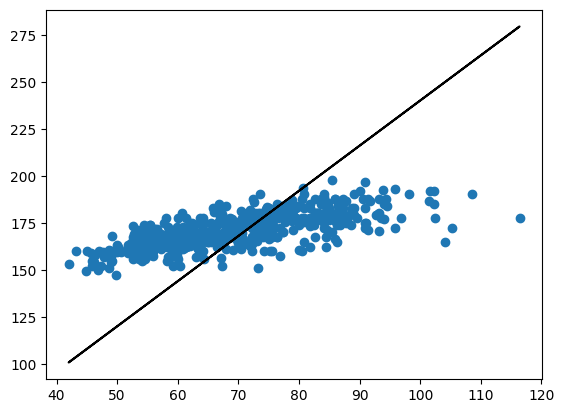

In [ ]:
# Q3 make a scatter plot of Weight and Height and superimpose the linear regression
plt.scatter(X,Y) # Scatter plot
plt.plot(X, linear_reg.intercept_+linear_reg.coef_*X, 'k') # Draw linear regression on top
    # -> What is the problem with this regression ? = no intercept was fitted linear_reg.intercept_ = 0

# Q4 -> What is the problem with this regression ?


In [ ]:
# Q5 -> Redo the same but corrcting the problem of the previous regression
linear_reg = LinearRegression(fit_intercept=True)
X = dat[['Weight']]
Y = dat['Height']
linear_reg.fit(X,Y)

LinearRegression()

In [ ]:
# Q6 look at the intercept and the coef of this model
intercept = linear_reg.intercept_
coef = linear_reg.coef_
intercept
coef

array([0.50604998])

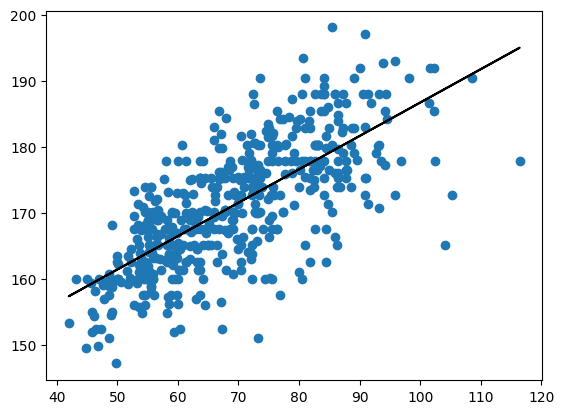

In [ ]:
# Q7 make a scatter plot of Weight and Height and superimpose the linear regression
plt.scatter(X,Y) # Scatter plot
plt.plot(X, linear_reg.intercept_+linear_reg.coef_*X, 'k') # Draw linear regression on top

In [ ]:
################# ################# #################
################# Multiple Linear regression
################# ################# #################
# Q8 Before computing regression with multiple factors, we need to zscore all factors so that they are comparable.
dat = (dat - dat.mean()) / dat.std()


In [ ]:
# Q9  Make a regression of the Height with two factors : Weight and Knee-girth
# Regression with two factors
linear_reg = LinearRegression(fit_intercept=True)
X = dat[['Weight', 'Knee_girth']]
Y = dat['Height']
linear_reg.fit(X,Y)
print(linear_reg.intercept_, linear_reg.coef_)



3.1909103814430607e-16 [ 0.81556598 -0.12291402]


<BarContainer object of 2 artists>

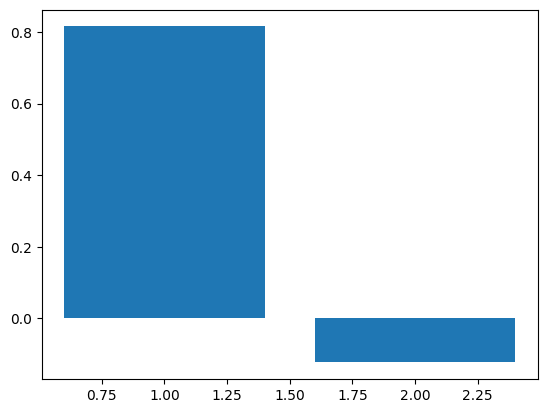

In [ ]:
# Q10 make a barplot showing the two coefficients of this regression
plt.bar([1,2], linear_reg.coef_)


In [ ]:
# Q11 How stable this is ? Compute confidence interval on the regression parameters using a boostrap approach. Create the loop to compute 1000 estimation of each coefs
n_boot=1000
all_coefs = []
for i in range(n_boot):
    lin_reg = LinearRegression(fit_intercept=True)
    subj_sample = choices(dat.index, k=np.shape(dat.index)[0])
    dat_sample = dat.loc[subj_sample,:]
    X = dat_sample[['Weight', 'Knee_girth']]
    Y = dat_sample['Height']
    lin_reg.fit(X, Y)
    all_coefs.append(lin_reg.coef_.tolist())
all_coefs = np.array(all_coefs)
all_coefs


array([[ 0.75189167, -0.08525327],
       [ 0.81138934, -0.17604974],
       [ 0.78317836, -0.09706672],
       ...,
       [ 0.85134404, -0.16830942],
       [ 0.84877983, -0.17861154],
       [ 0.85759563, -0.11356808]])

In [ ]:
# Q12 From these 1000 estimation, compute the confidence interval for both coefs
CI1 = np.percentile(all_coefs[:,0], [2.5, 97.5])
CI2 = np.percentile(all_coefs[:,1], [2.5, 97.5])
print(CI1, CI2)


[0.70679908 0.92544921] [-0.23251377  0.0015073 ]


<ErrorbarContainer object of 3 artists>

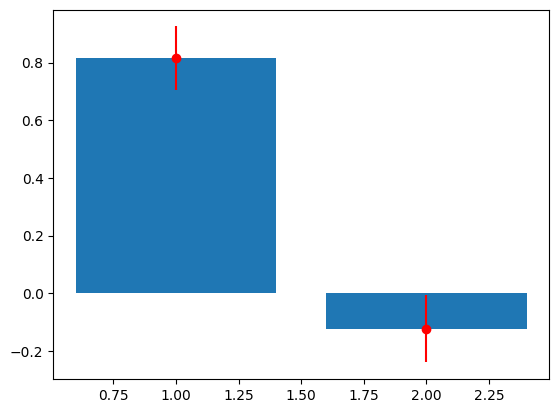

In [ ]:
# Q13 redo the bar plot and add the confidence interval
plt.bar([1,2], linear_reg.coef_)
plt.errorbar([1,2], linear_reg.coef_, yerr=[(CI1[1]-CI1[0])/2, (CI2[1]-CI2[0])/2], fmt="o", color="r")

In [ ]:
# Q14 Know look only at the simple regression between Height and Knee_girth
linear_reg = LinearRegression(fit_intercept=True)
X = dat[['Knee_girth']]
Y = dat['Height']
linear_reg.fit(X,Y)
linear_reg.intercept_
linear_reg.coef_
plt.scatter(X,Y) # Scatter plot
plt.plot(X, linear_reg.intercept_+linear_reg.coef_*X, 'k')



# Q15 -> What can you conclude ?

In [ ]:
# Q16 Now make a multiple linear regression predicting the Height based on all other factors.
linear_reg = LinearRegression(fit_intercept=True)
X = dat.loc[:, dat.columns != 'Height']
Y = dat['Height']
linear_reg.fit(X,Y)
print(linear_reg.intercept_,linear_reg.coef_)



In [ ]:
# Q17 And plot all coefs of this regression
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(X.keys(), linear_reg.coef_)
ax.tick_params(axis='x', rotation=90)


In [ ]:
# Q18 Redo the same but with using a ridge regression with alpha = 100
ridge_reg = Ridge(alpha=100)
X = dat.loc[:, dat.columns != 'Height']
Y = dat['Height']
ridge_reg.fit(X,Y)
ridge_reg.intercept_
ridge_reg.coef_
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(X.keys(), ridge_reg.coef_)
ax.tick_params(axis='x', rotation=90)

In [ ]:
# Q19 what do you observe ?


In [ ]:
# Q20 Compute the values of the parameters for ridge regressions with alpha varying between 10^-5 and 10^5
X = dat.loc[:, dat.columns != 'Height']
Y = dat['Height']
alphas = np.logspace(-5, 5, num=1000)
allcoefs = []
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, Y)
    allcoefs.append(ridge_reg.coef_)
allcoefs = np.array(allcoefs)
plt.xscale("log")
plt.plot(alphas,allcoefs)


In [ ]:
# Q21 Now compute a lasso regresson with alpha = 0.1
lasso_reg = Lasso(alpha=0.1)
X = dat.loc[:, dat.columns != 'Height']
Y = dat['Height']
lasso_reg.fit(X,Y)
lasso_reg.intercept_
lasso_reg.coef_
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(X.keys(), lasso_reg.coef_)
ax.tick_params(axis='x', rotation=90)

In [ ]:
# Q22 Compute and plot the values of the parameters for lasso regressions with alpha varying between 10^-5 and 10^5
X = dat.loc[:, dat.columns != 'Height']
Y = dat['Height']
alphas = np.logspace(-5, 5, num=1000)
allcoefs = []
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X, Y)
    allcoefs.append(lasso_reg.coef_)
allcoefs = np.array(allcoefs)
plt.xscale("log")
plt.plot(alphas,allcoefs)